In [15]:
import matplotlib.pyplot as plt

from General.experiments.hdf5.readHDF5 import read_hdf5
from General.experiments.waveforms import MeasuredWaveforms
from General.plotting import plot

In [16]:
loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Results\Ar_3slm_5kV_1us.hdf5'
image_loc = r'E:\OneDrive - TU Eindhoven\Master thesis\Tex\Images\Method'

data = read_hdf5(loc)['waveforms']
wavforms = MeasuredWaveforms.from_waveforms(data, channels={1: 'voltage', 2: 'current', 3: 'pulse_generator', 4: 'ground_current'})


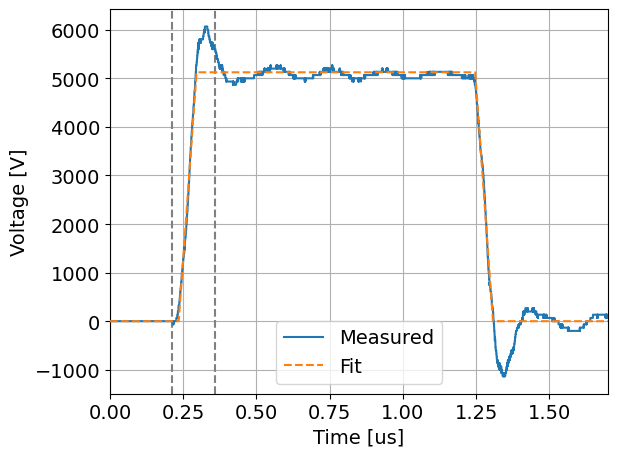

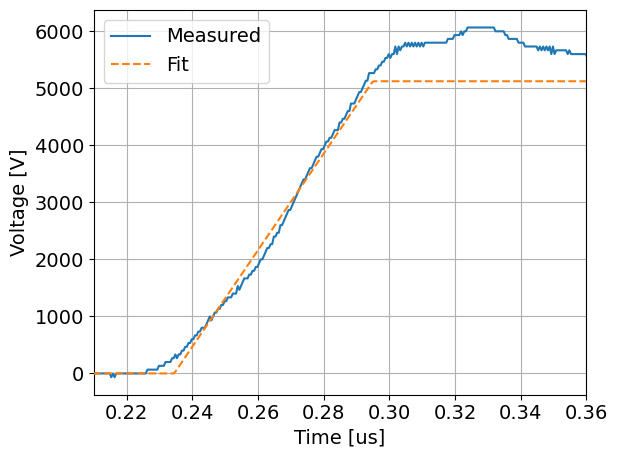

In [17]:
waveform = wavforms.get_average(300, 301)

index = 300
fit = MeasuredWaveforms._fit(waveform.time, waveform.voltage)

plot_kwargs = {'xlabel': 'Time [us]', 'ylabel': 'Voltage [V]', 'xlim': (0, 1.7)}
line_kwargs_iter = [{'linestyle': '-'}, {'linestyle': '--'}]
fig, ax = plot.lines(waveform.time*1e6, [waveform.voltage, fit.best_fit], labels=('Measured', 'Fit'), plot_kwargs=plot_kwargs, line_kwargs_iter=line_kwargs_iter, show=False)
ax.axvline(0.21, color='gray', linestyle='--')
ax.axvline(0.36, color='gray', linestyle='--')
plt.savefig(rf'{image_loc}\waveform_fit.pdf')
plt.show()


plot_kwargs = {'xlabel': 'Time [us]', 'ylabel': 'Voltage [V]', 'xlim': (0.21, 0.36)}
line_kwargs_iter = [{'linestyle': '-'}, {'linestyle': '--'}]
fig_ax = plot.lines(waveform.time*1e6, [waveform.voltage, fit.best_fit], labels=('Measured', 'Fit'), plot_kwargs=plot_kwargs, line_kwargs_iter=line_kwargs_iter, save_loc=rf'{image_loc}\waveform_fit_zoom.pdf')

fit_params = fit.params